In [0]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

In [0]:
mean = [0.49159113, 0.48234683, 0.44671977]
std= [0.23832777, 0.23483476, 0.25256896]

In [0]:
train_transform = transforms.Compose([
                                      transforms.Resize(32),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)
])

In [0]:
test_transform = transforms.Compose([
                                      transforms.Resize(32),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)
])

In [236]:
trainset = torchvision.datasets.CIFAR10(root='datasets/cifa10/train', download=True, train = True, transform= train_transform)

Files already downloaded and verified


In [237]:
testset = torchvision.datasets.CIFAR10(root='datasets/cifa10/test', download=True, train = False, transform= test_transform)

Files already downloaded and verified


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 16, shuffle=True)


In [0]:
testloader = torch.utils.data.DataLoader(testset, batch_size = 16, shuffle = False )

In [0]:
class_names = trainset.classes

In [241]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [0]:
# checking one batch of iamge

In [0]:
img, label = iter(trainloader).next()

In [244]:
img.shape

torch.Size([16, 3, 32, 32])

In [245]:
label

tensor([7, 0, 9, 0, 7, 6, 5, 6, 2, 2, 3, 8, 7, 3, 5, 3])

In [0]:
# designing CNN

In [0]:
in_size = 3 # RGB iamge
hid1_size = 16 # conv1 layer
hid2_size = 32 # conv2 layer

out1_size = 400 # linear layers
out2_size =10 # linear layers

k_conv_size = 5

In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(out1_size, out2_size)
    )

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)

    out = out.reshape(out.size(0), -1)
    out = self.layer3(out)

    return F.log_softmax(out, dim =1)

In [0]:
model = ConvNet()

In [250]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [251]:
model.to(device)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=800, out_features=400, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=400, out_features=10, bias=True)
  )
)

In [0]:
learning_rate = 0.001
crierian = nn.NLLLoss()


optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

In [0]:
total_step = len(trainloader)

num_epochs = 10
loss_values = list()

In [254]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    images, labels = images.to(device), labels.to(device)

    outputs= model(images)
    loss = crierian(outputs, labels)


    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % 2000 == 0:
      print('Epoch [{} / {}], Step [{} / {}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

      loss_values.append(loss.item())

Epoch [1 / 10], Step [2000 / 3125], Loss: 1.3782
Epoch [2 / 10], Step [2000 / 3125], Loss: 0.8727
Epoch [3 / 10], Step [2000 / 3125], Loss: 0.8942
Epoch [4 / 10], Step [2000 / 3125], Loss: 0.7834
Epoch [5 / 10], Step [2000 / 3125], Loss: 0.8260
Epoch [6 / 10], Step [2000 / 3125], Loss: 0.8243
Epoch [7 / 10], Step [2000 / 3125], Loss: 1.0868
Epoch [8 / 10], Step [2000 / 3125], Loss: 0.5427
Epoch [9 / 10], Step [2000 / 3125], Loss: 0.2084
Epoch [10 / 10], Step [2000 / 3125], Loss: 0.9858


Text(0, 0.5, 'loss')

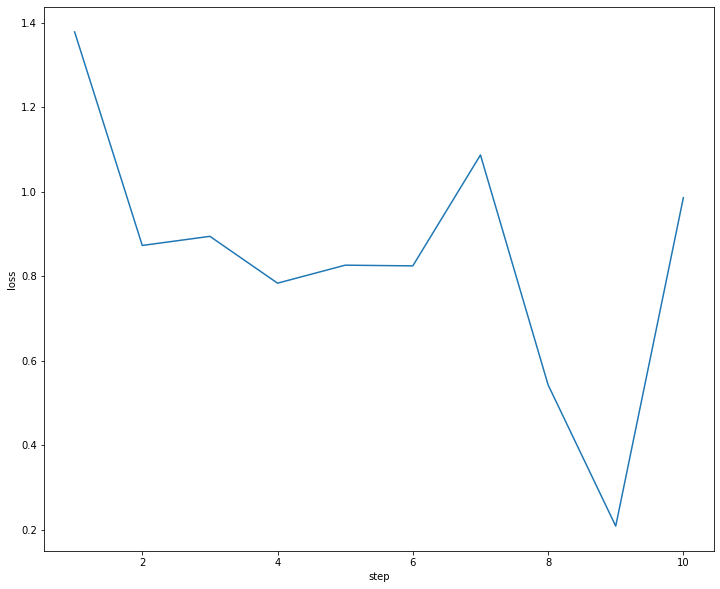

In [260]:
x = (range(1,11))
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))

plt.plot(x, loss_values)
plt.xlabel('step')
plt.ylabel('loss')


In [261]:
model.eval()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=800, out_features=400, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=400, out_features=10, bias=True)
  )
)

In [262]:
def calc_accuracy(model):
  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in testloader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data ,1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

    print("Accuracty of the model on the 10000 test images : {}%"\
          .format(100 * correct / total))
    

calc_accuracy(model)

Accuracty of the model on the 10000 test images : 72.56%


In [0]:
sample_img, _= testset[23]

In [264]:
sample_img.shape

torch.Size([3, 32, 32])

In [265]:
type(sample_img)

torch.Tensor

In [0]:
sample_img = np.transpose(sample_img, (1,2, 0))
m,M = sample_img.min(), sample_img.max()

In [0]:
sample_img= ( 1/ abs(M)) * sample_img + 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


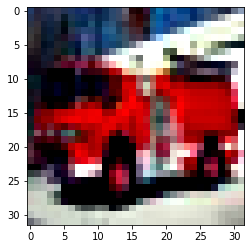

In [268]:
plt.imshow(sample_img)

In [0]:
test_img, test_label = testset[23]

In [0]:
test_img = test_img.reshape(-1, 3, 32 ,32)

In [0]:
out_predict = model(test_img.to(device))
_,predicted = torch.max(out_predict.data, 1)

In [272]:
print("actual label", test_label)

actual label 9


In [273]:
print("Actual label", predicted)

Actual label tensor([9], device='cuda:0')


# Different Activation Functions
## Using Sigmoid

In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.Sigmoid(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
        nn.Sigmoid(),
        nn.Dropout(0.5),
        nn.Linear(out1_size, out2_size)
    )

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)

    out = out.reshape(out.size(0), -1)
    out = self.layer3(out)

    return F.log_softmax(out, dim =1)

In [0]:
model = ConvNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
learning_rate = 0.001
crierian = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
total_step = len(trainloader)
num_epochs = 10
loss_values = list()



In [276]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    images, labels = images.to(device), labels.to(device)

    outputs= model(images)
    loss = crierian(outputs, labels)


    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % 2000 == 0:
      print('Epoch [{} / {}], Step [{} / {}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

      loss_values.append(loss.item())

Epoch [1 / 10], Step [2000 / 3125], Loss: 1.2966
Epoch [2 / 10], Step [2000 / 3125], Loss: 1.7431
Epoch [3 / 10], Step [2000 / 3125], Loss: 1.2304
Epoch [4 / 10], Step [2000 / 3125], Loss: 0.8951
Epoch [5 / 10], Step [2000 / 3125], Loss: 0.8990
Epoch [6 / 10], Step [2000 / 3125], Loss: 0.7269
Epoch [7 / 10], Step [2000 / 3125], Loss: 1.1045
Epoch [8 / 10], Step [2000 / 3125], Loss: 1.0710
Epoch [9 / 10], Step [2000 / 3125], Loss: 0.9170
Epoch [10 / 10], Step [2000 / 3125], Loss: 0.6716


In [277]:
calc_accuracy(model)

Accuracty of the model on the 10000 test images : 68.98%


## Using tanh

In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.Tanh(),
        nn.MaxPool2d(kernel_size=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.Tanh(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
        nn.Tanh(),
        nn.Dropout(0.5),
        nn.Linear(out1_size, out2_size)
    )

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)

    out = out.reshape(out.size(0), -1)
    out = self.layer3(out)

    return F.log_softmax(out, dim =1)

In [0]:
model = ConvNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
learning_rate = 0.001
crierian = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
total_step = len(trainloader)
num_epochs = 10
loss_values = list()



In [280]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    images, labels = images.to(device), labels.to(device)

    outputs= model(images)
    loss = crierian(outputs, labels)


    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % 2000 == 0:
      print('Epoch [{} / {}], Step [{} / {}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

      loss_values.append(loss.item())

Epoch [1 / 10], Step [2000 / 3125], Loss: 2.0896
Epoch [2 / 10], Step [2000 / 3125], Loss: 1.2474
Epoch [3 / 10], Step [2000 / 3125], Loss: 0.8982
Epoch [4 / 10], Step [2000 / 3125], Loss: 1.0038
Epoch [5 / 10], Step [2000 / 3125], Loss: 1.1705
Epoch [6 / 10], Step [2000 / 3125], Loss: 0.7655
Epoch [7 / 10], Step [2000 / 3125], Loss: 0.9047
Epoch [8 / 10], Step [2000 / 3125], Loss: 1.0239
Epoch [9 / 10], Step [2000 / 3125], Loss: 0.9082
Epoch [10 / 10], Step [2000 / 3125], Loss: 1.8968


In [281]:
calc_accuracy(model)

Accuracty of the model on the 10000 test images : 68.5%


# Changing Pooling Layers

## Average Pooliing

In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.Tanh(),
        nn.AvgPool2d(kernel_size=2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
        nn.Tanh(),
        nn.Dropout(0.5),
        nn.Linear(out1_size, out2_size)
    )

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)

    out = out.reshape(out.size(0), -1)
    out = self.layer3(out)

    return F.log_softmax(out, dim =1)

In [0]:
model = ConvNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
learning_rate = 0.001
crierian = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
total_step = len(trainloader)
num_epochs = 10
loss_values = list()



In [284]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    images, labels = images.to(device), labels.to(device)

    outputs= model(images)
    loss = crierian(outputs, labels)


    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % 2000 == 0:
      print('Epoch [{} / {}], Step [{} / {}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

      loss_values.append(loss.item())

Epoch [1 / 10], Step [2000 / 3125], Loss: 1.9120
Epoch [2 / 10], Step [2000 / 3125], Loss: 1.5844
Epoch [3 / 10], Step [2000 / 3125], Loss: 1.1739
Epoch [4 / 10], Step [2000 / 3125], Loss: 1.0349
Epoch [5 / 10], Step [2000 / 3125], Loss: 1.0196
Epoch [6 / 10], Step [2000 / 3125], Loss: 1.7041
Epoch [7 / 10], Step [2000 / 3125], Loss: 1.5638
Epoch [8 / 10], Step [2000 / 3125], Loss: 1.2720
Epoch [9 / 10], Step [2000 / 3125], Loss: 0.9111
Epoch [10 / 10], Step [2000 / 3125], Loss: 1.1132


In [285]:
calc_accuracy(model)

Accuracty of the model on the 10000 test images : 64.87%


## Using LpPool that is availabe in pytorch

In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.Tanh(),
        nn.LPPool2d(1, kernel_size=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.Tanh(),
        nn.LPPool2d(1, kernel_size=2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(hid2_size * k_conv_size * k_conv_size, out1_size),
        nn.Tanh(),
        nn.Dropout(0.5),
        nn.Linear(out1_size, out2_size)
    )

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)

    out = out.reshape(out.size(0), -1)
    out = self.layer3(out)

    return F.log_softmax(out, dim =1)

In [0]:
model = ConvNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
learning_rate = 0.001
crierian = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
total_step = len(trainloader)
num_epochs = 10
loss_values = list()



In [288]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    images, labels = images.to(device), labels.to(device)

    outputs= model(images)
    loss = crierian(outputs, labels)


    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % 2000 == 0:
      print('Epoch [{} / {}], Step [{} / {}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

      loss_values.append(loss.item())

Epoch [1 / 10], Step [2000 / 3125], Loss: 1.3878
Epoch [2 / 10], Step [2000 / 3125], Loss: 1.3795
Epoch [3 / 10], Step [2000 / 3125], Loss: 1.4499
Epoch [4 / 10], Step [2000 / 3125], Loss: 1.0473
Epoch [5 / 10], Step [2000 / 3125], Loss: 1.0314
Epoch [6 / 10], Step [2000 / 3125], Loss: 1.4514
Epoch [7 / 10], Step [2000 / 3125], Loss: 1.0771
Epoch [8 / 10], Step [2000 / 3125], Loss: 1.7043
Epoch [9 / 10], Step [2000 / 3125], Loss: 1.2098
Epoch [10 / 10], Step [2000 / 3125], Loss: 1.2910


In [289]:
calc_accuracy(model)

Accuracty of the model on the 10000 test images : 54.48%


# Adding More Colvolutional Layers

In [0]:
train_transform = transforms.Compose([
                                      transforms.Resize(128),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)
])

In [0]:
test_transform = transforms.Compose([
                                      transforms.Resize(128),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean, std)
])

In [6]:
trainset = torchvision.datasets.CIFAR10(root='datasets/cifa10/train', download=True, train = True, transform= train_transform)

Extracting datasets/cifa10/train/cifar-10-python.tar.gz to datasets/cifa10/train


In [7]:
testset = torchvision.datasets.CIFAR10(root='datasets/cifa10/test', download=True, train = False, transform= test_transform)

Extracting datasets/cifa10/test/cifar-10-python.tar.gz to datasets/cifa10/test


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 16, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 16, shuffle = False )


In [0]:
in_size = 3 # RGB iamge
hid1_size = 16 # conv1 layer
hid2_size = 32 # conv2 layer
hid3_size = 64

out1_size = 2000 # linear layers
out2_size =10 # linear layers

k_conv_size = 9

In [0]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_size, hid1_size, k_conv_size),
        nn.BatchNorm2d(hid1_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size),
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.layer3 = nn.Sequential(
        nn.Conv2d(hid2_size, hid3_size, k_conv_size),
        nn.BatchNorm2d(hid3_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )


    self.layer4 = nn.Sequential(
        nn.Linear(hid3_size * k_conv_size * k_conv_size, out1_size),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(out1_size, out2_size)
    )

  def forward(self,x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)

    out = out.reshape(out.size(0), -1)
    out = self.layer4(out)

    return F.log_softmax(out, dim =1)

In [0]:
model = ConvNet()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
learning_rate = 0.001
crierian = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)
total_step = len(trainloader)
num_epochs = 10
loss_values = list()



In [20]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(trainloader):
    images, labels = images.to(device), labels.to(device)

    outputs= model(images)
    loss = crierian(outputs, labels)


    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % 2000 == 0:
      print('Epoch [{} / {}], Step [{} / {}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

      loss_values.append(loss.item())

Epoch [1 / 10], Step [2000 / 3125], Loss: 1.7725
Epoch [2 / 10], Step [2000 / 3125], Loss: 1.7090
Epoch [3 / 10], Step [2000 / 3125], Loss: 0.8606
Epoch [4 / 10], Step [2000 / 3125], Loss: 0.8544
Epoch [5 / 10], Step [2000 / 3125], Loss: 0.5069
Epoch [6 / 10], Step [2000 / 3125], Loss: 0.8779
Epoch [7 / 10], Step [2000 / 3125], Loss: 0.9875
Epoch [8 / 10], Step [2000 / 3125], Loss: 0.8182
Epoch [9 / 10], Step [2000 / 3125], Loss: 0.8828
Epoch [10 / 10], Step [2000 / 3125], Loss: 0.4900


In [0]:
calc_accuracy(model)